In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression, Lasso

In [30]:
model_train1 = pd.read_csv('C:\\Users\\BGCNHK\\Desktop\\clean_train_Ting.csv', index_col = 0)
model_train2 = pd.read_csv('C:\\Users\\BGCNHK\\Desktop\\train_lanqing.csv', index_col = 1)
model_train3 = pd.read_csv('C:\\Users\\BGCNHK\\Desktop\\Bootcamp\\Projects\\final_model_train.csv', index_col = 1)
model_train4 = pd.read_csv('C:\\Users\\BGCNHK\\Desktop\\model_train_Alex2.csv', index_col = 0)

In [39]:
model_test1 = pd.read_csv('C:\\Users\\BGCNHK\\Desktop\\clean_test_Ting.csv', index_col = 0)
model_test2 = pd.read_csv('C:\\Users\\BGCNHK\\Desktop\\test_lanqing.csv', index_col = 1)
model_test3 = pd.read_csv('C:\\Users\\BGCNHK\\Desktop\\Bootcamp\\Projects\\final_model_test.csv', index_col = 1)
model_test4 = pd.read_csv('C:\\Users\\BGCNHK\\Desktop\\model_test_Alex2.csv', index_col = 0)

In [42]:
ktest1 = pd.read_csv('C:\\Users\\BGCNHK\\Desktop\\clean_Ktest_Ting.csv', index_col = 0)
ktest2 = pd.read_csv('C:\\Users\\BGCNHK\Desktop\\Ktest_lanqing.csv', index_col = 1)
ktest3 = pd.read_csv('C:\\Users\\BGCNHK\\Desktop\\Bootcamp\\Projects\\final_test_df.csv', index_col = 0)
ktest4 = pd.read_csv('C:\\Users\\BGCNHK\\Downloads\\model_test_Alex2.csv', index_col = 0)

In [233]:
# model_train = pd.merge(model_train1,model_train2, on='Id')
# model_train = pd.merge(model_train, model_train3, on='Id')
# model_train = pd.merge(model_train, model_train4, on='Id')
# model_train = model_train.drop('Id',axis=1)
# modeltrain_SalePrice = model_train['SalePrice']
model_train = model_train.drop('SalePrice', axis=1)

In [254]:
model_train.shape

(1168, 194)

In [234]:
# model_test = pd.merge(model_test1,model_test2, on='Id')
# model_test = pd.merge(model_test, model_test3, on='Id')
# model_test = pd.merge(model_test, model_test4, on='Id')
# model_test = model_test.drop('Id',axis=1)
# modeltest_SalePrice = model_test['SalePrice']
model_test = model_test.drop('SalePrice', axis=1)

In [255]:
model_test.shape

(292, 194)

In [174]:
# ktest = pd.merge(ktest1,ktest2, on='Id')
# ktest = pd.merge(ktest, ktest3, on='Id')
# ktest = pd.merge(ktest, ktest4, on='Id')
# ktest = ktest.drop('Id',axis=1)

In [256]:
X_train = model_train.copy()
X_test = model_test.copy()
X_ktest = ktest.copy()

In [258]:
X_test.shape

(292, 194)

In [182]:
y_train = np.log(modeltrain_SalePrice)
y_test = np.log(modeltest_SalePrice)

In [236]:
ols = LinearRegression()
ols.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [237]:
print("beta: " + str(np.round(ols.coef_, 3)))
print("beta_0: " + str(np.round(ols.intercept_, 3)))
print("RSS: %.2f" % np.sum((ols.predict(X_train) - y_train) ** 2))
print("R^2: %.5f" % ols.score(X_train, y_train))

beta: [ 6.40000000e-02 -3.95000000e-01  4.90000000e-02  1.60000000e-02
 -5.00000000e-03 -8.90000000e-02 -2.40000000e-02  6.60000000e-02
 -5.00000000e-03  2.00000000e-03  3.70000000e-02 -3.60000000e-02
 -1.90000000e-02 -2.40000000e-02 -2.96000000e-01  7.00000000e-03
  3.50000000e-02 -8.20000000e-02 -1.19000000e-01  3.70000000e-02
 -1.00000000e-02  5.00000000e-02  3.40000000e-02 -2.60000000e-02
  6.60000000e-02  6.30000000e-02  7.00000000e-03  1.62000000e-01
 -5.50000000e-02 -4.90000000e-02 -2.90000000e-02 -7.50000000e-02
 -2.30000000e-02  2.40000000e-02 -3.60000000e-02  1.30000000e-01
  1.30000000e-01  3.20000000e-02  6.80000000e-02 -6.00000000e-03
  8.00000000e-03  3.70000000e-02  2.10000000e-01  1.30000000e-02
  7.20000000e-02 -9.20000000e-02 -3.20000000e-02  3.20000000e-02
 -5.80000000e-02 -1.53000000e-01 -1.20000000e-02 -4.70000000e-02
 -1.90000000e-02 -6.80000000e-02 -1.20000000e-02 -5.80000000e-02
 -7.10000000e-02  2.90000000e-02 -4.00000000e-03 -1.00000000e-02
  3.10000000e-02 -1

In [238]:
import statsmodels.api as sm 
X_add_const = sm.add_constant(X_train)
ols = sm.OLS(y_train, X_add_const)
ans = ols.fit()
print(ans.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     61.18
Date:                Sun, 01 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:19:59   Log-Likelihood:                 909.80
No. Observations:                1168   AIC:                            -1444.
Df Residuals:                     980   BIC:                            -491.8
Df Model:                         187                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.03

C:\Users\BGCNHK\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [239]:
ans.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,12.0318,0.029,411.267,0.000,11.974,12.089
MSSubClass_PUD,0.0641,0.081,0.789,0.430,-0.095,0.224
MSZoning_C (all),-0.3954,0.060,-6.570,0.000,-0.514,-0.277
MSZoning_FV,0.0486,0.039,1.233,0.218,-0.029,0.126
MSZoning_RH,0.0154,0.039,0.395,0.693,-0.061,0.092
MSZoning_RM,-0.0053,0.022,-0.241,0.810,-0.048,0.038
Street_Grvl,-0.0891,0.076,-1.174,0.241,-0.238,0.060
Alley_Grvl,-0.0242,0.024,-1.027,0.305,-0.071,0.022
Alley_Pave,0.0657,0.030,2.205,0.028,0.007,0.124
LotShape_IR1,-0.0048,0.010,-0.490,0.624,-0.024,0.014


In [240]:
table = pd.DataFrame(ans.summary().tables[1].data[1:])
table.columns = ['name','coef','std err','t value','p value','2.5% confidence','97.5% confidence']
table = table.astype({'name':str,'coef':float,'std err':float, 't value':float, 'p value':float,'2.5% confidence':float, '97.5% confidence':float})
table[table['p value']<0.05]  #if p value is zero, the chance that coefficent being 0 is really low. null hypothesis is not zero

,name,coef,std err,t value,p value,2.5% confidence,97.5% confidence
0,const,1.203180e+01,2.900000e-02,411.267,0.000,1.197400e+01,1.208900e+01
2,MSZoning_C (all),-3.954000e-01,6.000000e-02,-6.570,0.000,-5.140000e-01,-2.770000e-01
8,Alley_Pave,6.570000e-02,3.000000e-02,2.205,0.028,7.000000e-03,1.240000e-01
15,Utilities_NoSeWa,-2.977000e-01,1.390000e-01,-2.138,0.033,-5.710000e-01,-2.400000e-02
18,LotConfig_FR2,-8.190000e-02,2.400000e-02,-3.473,0.001,-1.280000e-01,-3.600000e-02
25,Neighborhood_BrkSide,6.650000e-02,3.000000e-02,2.236,0.026,8.000000e-03,1.250000e-01
28,Neighborhood_Crawfor,1.618000e-01,2.700000e-02,5.917,0.000,1.080000e-01,2.160000e-01
29,Neighborhood_Edwards,-5.450000e-02,2.000000e-02,-2.743,0.006,-9.400000e-02,-1.600000e-02
36,Neighborhood_NoRidge,1.302000e-01,3.100000e-02,4.253,0.000,7.000000e-02,1.900000e-01
37,Neighborhood_NridgHt,1.297000e-01,2.900000e-02,4.457,0.000,7.300000e-02,1.870000e-01


In [241]:
table[table['p value']>=0.05]

,name,coef,std err,t value,p value,2.5% confidence,97.5% confidence
1,MSSubClass_PUD,0.0641,0.081,0.789,0.430,-0.095,0.224
3,MSZoning_FV,0.0486,0.039,1.233,0.218,-0.029,0.126
4,MSZoning_RH,0.0154,0.039,0.395,0.693,-0.061,0.092
5,MSZoning_RM,-0.0053,0.022,-0.241,0.810,-0.048,0.038
6,Street_Grvl,-0.0891,0.076,-1.174,0.241,-0.238,0.060
...,...,...,...,...,...,...,...
186,SaleType_ConLI,0.0110,0.065,0.169,0.866,-0.117,0.139
187,SaleType_ConLw,-0.0411,0.065,-0.630,0.529,-0.169,0.087
189,SaleType_Oth,0.0340,0.078,0.434,0.665,-0.120,0.188
191,SaleCondition_AdjLand,0.0468,0.085,0.548,0.584,-0.121,0.214


In [242]:
from sklearn.model_selection import GridSearchCV
lasso = Lasso()

In [243]:
lasso.set_params(alpha=0.0001, normalize=True)
lasso.fit(X_train, y_train)
print('The intercept is %.4f' %(lasso.intercept_))
lassoCoef = pd.Series(lasso.coef_, index=model_train.columns)
print('The slopes are \n%s' %(lassoCoef))

The intercept is 12.0277
The slopes are 
MSSubClass_PUD          -0.000000
MSZoning_C (all)        -0.342015
MSZoning_FV              0.021211
MSZoning_RH              0.000000
MSZoning_RM             -0.008591
                           ...   
SaleCondition_Abnorml   -0.025027
SaleCondition_AdjLand    0.000000
SaleCondition_Alloca    -0.004318
SaleCondition_Family    -0.034375
SaleCondition_Partial    0.000039
Length: 194, dtype: float64


Text(0.5, 1.0, 'Change of Lasso Intercept Varying Alpha')

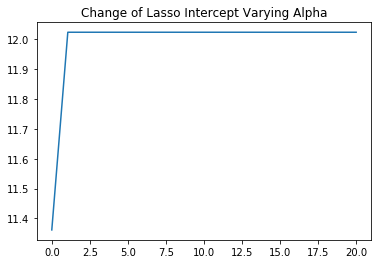

In [244]:
plt.plot(alphaRange, intercepts)
plt.title('Change of Lasso Intercept Varying Alpha')

In [267]:
lasso.fit(model_train, y_train)
print('The intercept is %.4f' %(lasso.intercept_))
lassoCoef = pd.Series(lasso.coef_, index=model_train.columns)
# df.loc[:, ~df.columns.isin(['b'])]
# df.loc[:, df.columns != 'b']
# print('The slopes are \n%s' %(lassoCoef))
lassoCoef

The intercept is 12.0277


MSSubClass_PUD          -0.000000
MSZoning_C (all)        -0.342015
MSZoning_FV              0.021211
MSZoning_RH              0.000000
MSZoning_RM             -0.008591
                           ...   
SaleCondition_Abnorml   -0.025027
SaleCondition_AdjLand    0.000000
SaleCondition_Alloca    -0.004318
SaleCondition_Family    -0.034375
SaleCondition_Partial    0.000039
Length: 194, dtype: float64

In [246]:
lassoCoef

MSSubClass_PUD          -0.000000
MSZoning_C (all)        -0.342015
MSZoning_FV              0.021211
MSZoning_RH              0.000000
MSZoning_RM             -0.008591
                           ...   
SaleCondition_Abnorml   -0.025027
SaleCondition_AdjLand    0.000000
SaleCondition_Alloca    -0.004318
SaleCondition_Family    -0.034375
SaleCondition_Partial    0.000039
Length: 194, dtype: float64

In [247]:
lassoCoef.loc[~(lassoCoef==0)]

MSZoning_C (all)        -0.342015
MSZoning_FV              0.021211
MSZoning_RM             -0.008591
Street_Grvl             -0.053725
Alley_Grvl              -0.013998
                           ...   
SaleType_New             0.033316
SaleCondition_Abnorml   -0.025027
SaleCondition_Alloca    -0.004318
SaleCondition_Family    -0.034375
SaleCondition_Partial    0.000039
Length: 103, dtype: float64

In [248]:
lassoCoef.loc[~(lassoCoef==0)].index.values.tolist()

['MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RM',
 'Street_Grvl',
 'Alley_Grvl',
 'Alley_Pave',
 'LandContour_Bnk',
 'Utilities_NoSeWa',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LandSlope_Mod',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Veenker',
 'Condition1_Artery',
 'Condition1_Feedr',
 'Condition1_PosN',
 'Condition1_RRAe',
 'BldgType_2fmCon',
 'HouseStyle_1.5Fin',
 'HouseStyle_2Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'OverallQual',
 'OverallCond',
 'AgeBuilt',
 'AgeRemodAdd',
 'LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 'ExterQual',
 'BsmtQual',
 'BsmtExposure

In [249]:
selected_feature = lassoCoef.loc[~(lassoCoef==0)].index.values.tolist()

In [250]:
X_train2 = model_train[selected_feature]

In [281]:
lasso.set_params(alpha=0.00001, normalize=True)
lasso.fit(X_train2, y_train)
print('The intercept is %.4f' %(lasso.intercept_))
lassoCoef = pd.Series(lasso.coef_, index=X_train2.columns)
print('The slopes are \n%s' %(lassoCoef))

The intercept is 12.0358
The slopes are 
MSZoning_C (all)        -0.367778
MSZoning_FV              0.040054
MSZoning_RM              0.000000
Street_Grvl             -0.086354
Alley_Grvl              -0.013907
                           ...   
SaleType_New             0.036819
SaleCondition_Abnorml   -0.032408
SaleCondition_Alloca    -0.039631
SaleCondition_Family    -0.062897
SaleCondition_Partial    0.000048
Length: 103, dtype: float64


In [285]:
import math
# RSS = np.sum((y_train-lasso.predict(X_train))**2)
RSS

16.119042979079516

In [283]:
RSS2 = np.sum((y_train-lasso.predict(X_train2))**2)
RSS2

14.985672412053994

In [278]:
math.sqrt(RSS/X_train.shape[0])

0.11747574428701126

In [287]:
math.sqrt(RSS2/X_train2.shape[0])

0.11327046827361022

In [288]:
test_score = ols.score(X_test, y_test)

ValueError: shapes (195,195) and (292,194) not aligned: 195 (dim 1) != 292 (dim 0)

In [290]:
test.sc

(292,)